In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
X, y = mnist["data"] , mnist["target"]

In [4]:
%matplotlib inline

In [5]:
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

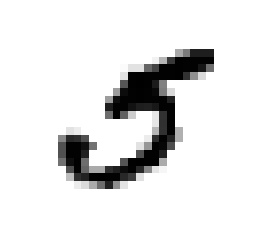

In [6]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)

In [9]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd_clf = SGDClassifier(random_state=42)

In [13]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [15]:
from sklearn.model_selection import cross_val_score

Split the training set into 3 sub sets and randomly selects a set and tests it with the other 2 sets

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96235,  0.95195,  0.96605])

This class below is a classifier that never classifies an image as 5

In [17]:
from sklearn.base import BaseEstimator

In [18]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9092 ,  0.911  ,  0.90875])

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_predict)

array([[53681,   898],
       [ 1495,  3926]])

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_train_5, y_train_predict)

0.8138474295190713

In [26]:
recall_score(y_train_5, y_train_predict)

0.72422062350119909

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_5, y_train_predict)

0.76642264519277692

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 173922.14223569])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([ True], dtype=bool)

In [32]:
threshold = 140000
y_some_digit_predict = (y_scores > threshold)
y_some_digit_predict

array([ True], dtype=bool)

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [36]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim(0,1)

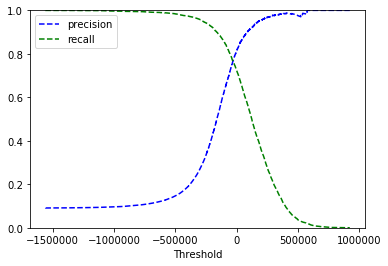

In [37]:
plot_precision_recall_vs_threshold(precisions,recalls, thresholds)

In [38]:
y_train_pred_90 = (y_scores > 70000)

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.88707037643207853

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.59988931931377976

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

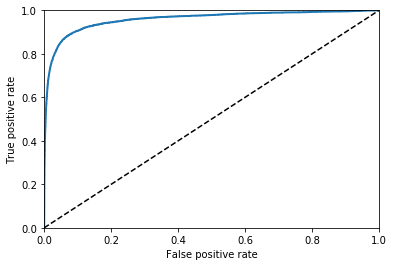

In [44]:
plot_roc_curve(fpr, tpr)

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_train_5, y_scores)

0.95887826901969042

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest_clf = RandomForestClassifier(random_state=42)

In [49]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [50]:
y_probas_forest

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.9,  0.1]])

In [51]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

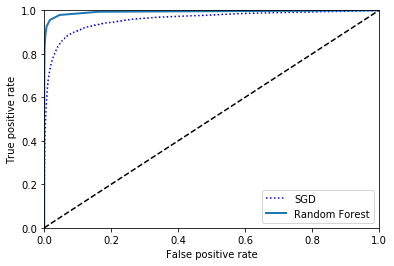

In [52]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [53]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931412509659262

In [54]:
some_digit_scores = sgd_clf.fit(X_train, y_train)

In [55]:
sgd_clf.predict([some_digit])

array([ 5.])

In [56]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [57]:
some_digit_scores

array([[ -87504.31766084, -449665.13273382, -569440.10464555,
        -108716.87443114, -516691.25163849,  173922.14223569,
        -659648.38289948, -343815.03726059, -747651.58578887,
        -532979.83107843]])

In [58]:
np.argmax(some_digit_scores)

5

In [59]:
sgd_clf.classes_.shape

(10,)

In [60]:
sgd_clf.classes_[5]

5.0

In [61]:
from sklearn.multiclass import OneVsOneClassifier

In [62]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [63]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
          n_jobs=1)

In [64]:
ovo_clf.predict([some_digit])

array([ 5.])

In [65]:
len(ovo_clf.estimators_)

45

In [66]:
ovo_clf.decision_function([some_digit])

array([[ 7.3034324 ,  3.87703411,  3.97520957,  8.33550121,  3.87263958,
         9.5       ,  0.63276495,  3.94415156,  1.6921643 ,  1.86710232]])

In [67]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [68]:
forest_clf.predict([some_digit])

array([ 5.])

In [69]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85522895,  0.86339317,  0.8626794 ])

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [74]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91226755,  0.91129556,  0.9073361 ])

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [76]:
conf_mx = confusion_matrix(y_train, y_train_pred)

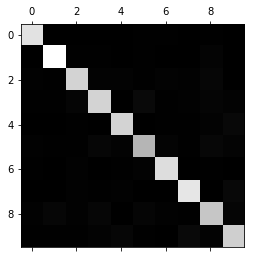

In [77]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [78]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

In [79]:
norm_conf_mx = conf_mx/row_sums

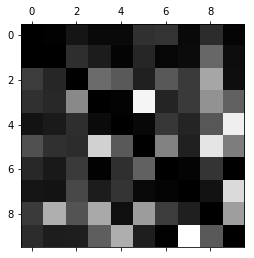

In [80]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
y_train_large = (y_train >= 7)

In [83]:
y_train_odd = (y_train % 2 ==1)

In [84]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [85]:
y_multilabel

array([[False, False],
       [ True, False],
       [False,  True],
       ..., 
       [False, False],
       [ True,  True],
       [False,  True]], dtype=bool)

In [86]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [87]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [88]:
X_train_mod = X_train + noise

In [89]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [90]:
X_test_mod = X_test + noise

In [91]:
X_test_mod

array([[36, 37, 21, ..., 85, 96, 71],
       [ 3, 34, 72, ..., 85, 47, 27],
       [31, 13, 50, ..., 12, 86, 59],
       ..., 
       [96, 66, 53, ..., 87,  5, 73],
       [83, 26, 22, ..., 80, 32, 88],
       [74, 50, 20, ..., 15, 86,  7]])

In [92]:
y_train_mode = X_train

In [93]:
X_test_mod

array([[36, 37, 21, ..., 85, 96, 71],
       [ 3, 34, 72, ..., 85, 47, 27],
       [31, 13, 50, ..., 12, 86, 59],
       ..., 
       [96, 66, 53, ..., 87,  5, 73],
       [83, 26, 22, ..., 80, 32, 88],
       [74, 50, 20, ..., 15, 86,  7]])

In [94]:
y_test_mode = X_test

In [95]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

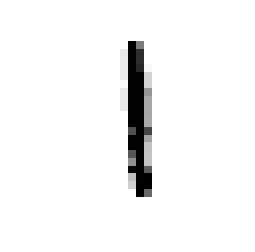

In [96]:
some_index = 1000
knn_clf.fit(X_train_mod, y_train_mode)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [97]:
x

NameError: name 'x' is not defined